In [2]:
import os
import glob
import shutil
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
cwd = os.getcwd()
train_path = cwd + '/data/cifar/train/'
# go through classes and make a directory for each one
for class_now in classes:
    path_now = train_path + class_now
    if not os.path.exists(path_now):
        os.makedirs(path_now)
# go through classes and match them with file names
# file names are e.g. '123_frog.png' so glob picks out all the e.g. frog files
for class_now in classes:
    identifier = train_path + '*' + class_now + '.png'
    class_files = glob.glob(identifier)
    file_destination = train_path + class_now
    # move all frog files to proper class directory
    for file_to_move in class_files:
        shutil.move(file_to_move, file_destination)

# do all the same but now for the test data
test_path = cwd + '/data/cifar/test/'
for class_now in classes:
    path_now = test_path + class_now
    if not os.path.exists(path_now):
        os.makedirs(path_now)
for class_now in classes:
    identifier = test_path + '*' + class_now + '.png'
    class_files = glob.glob(identifier)
    file_destination = test_path + class_now
    for file_to_move in class_files:
        shutil.move(file_to_move, file_destination)

In [6]:
!ls {train_path}bird

10018_bird.png	18863_bird.png	28043_bird.png	36524_bird.png	4598_bird.png
10027_bird.png	18872_bird.png	28051_bird.png	36539_bird.png	45990_bird.png
1003_bird.png	18880_bird.png	28057_bird.png	36570_bird.png	45997_bird.png
10057_bird.png	18882_bird.png	28095_bird.png	36581_bird.png	45998_bird.png
10083_bird.png	18886_bird.png	28107_bird.png	36583_bird.png	46000_bird.png
10089_bird.png	18888_bird.png	28108_bird.png	36585_bird.png	46005_bird.png
1008_bird.png	18901_bird.png	28112_bird.png	36598_bird.png	46014_bird.png
10093_bird.png	18948_bird.png	28114_bird.png	36616_bird.png	46016_bird.png
1009_bird.png	18952_bird.png	28116_bird.png	36622_bird.png	4604_bird.png
10152_bird.png	18964_bird.png	28124_bird.png	36626_bird.png	46053_bird.png
10155_bird.png	18987_bird.png	2812_bird.png	3662_bird.png	46082_bird.png
10160_bird.png	18995_bird.png	28158_bird.png	36635_bird.png	46088_bird.png
10180_bird.png	18_bird.png	28161_bird.png	36639_bird.png	46089_bird.png
10204_bird.png	19001_bird.png	28164

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [10]:

from fastai.conv_learner import *
PATH = "data/cifar/"

In [12]:
!ls {PATH}train

airplane    bird  cat	dog   horse  ship
automobile  car   deer	frog  plane  truck


In [13]:
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))


In [14]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats,sz,aug_tfms=[RandomFlip()],pad=sz//8)
    return ImageClassifierData.from_paths(PATH,val_name='test',tfms=tfms,bs=bs)

In [15]:
bs=256

Lets look at the data:

In [16]:
data = get_data(32,4)

In [17]:
x,y=next(iter(data.trn_dl))

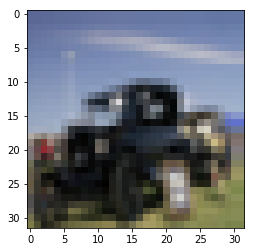

In [18]:
plt.imshow(data.trn_ds.denorm(x)[0])

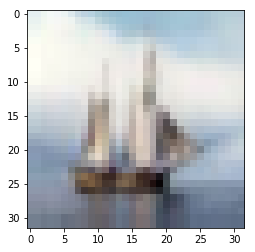

In [19]:
plt.imshow(data.trn_ds.denorm(x)[1])

## Fully Connected Model

In [20]:
data = get_data(32,bs)

In [23]:
lr=1e-2

In [24]:
class SimpleNet(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Linear(layers[i], layers[i + 1]) for i in range(len(layers) - 1)])
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for l in self.layers:
            l_x = l(x)
            x = F.relu(l_x)
        return F.log_softmax(l_x, dim=-1)

In [25]:
learn = ConvLearner.from_model_data(SimpleNet([32*32*3, 40,10]),data)

In [26]:
learn, [o.numel() for o in learn.model.parameters()]

(SimpleNet(
   (layers): ModuleList(
     (0): Linear(in_features=3072, out_features=40, bias=True)
     (1): Linear(in_features=40, out_features=10, bias=True)
   )
 ), [122880, 40, 400, 10])

In [27]:
learn.summary()

OrderedDict([('Linear-1',
              OrderedDict([('input_shape', [-1, 3072]),
                           ('output_shape', [-1, 40]),
                           ('trainable', True),
                           ('nb_params', 122920)])),
             ('Linear-2',
              OrderedDict([('input_shape', [-1, 40]),
                           ('output_shape', [-1, 10]),
                           ('trainable', True),
                           ('nb_params', 410)]))])

In [28]:
learn.lr_find()

  0%|          | 0/196 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCTensorMath.cu:26

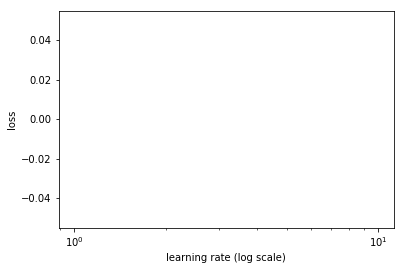

In [29]:
learn.sched.plot()

In [30]:
learn.fit(lr,2)

  0%|          | 0/196 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58